In [1]:
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def count_agreements(img, points):
    '''
    `img` is a binary image containing ground truth marks and `points` 
    are the points detected by the algorithm
    
    Parameters
    ----------
    img : numpy array
        Binary image
    points : numpy array
        Nx2 array containing the points
        
    Returns
    -------
    tp : int
        True positives
    fp : int
        False positives
    fn : int
        False negatives
    '''
    
    img_points = np.zeros_like(img, dtype=np.uint8)
    img_points[points[:,0], points[:,1]] = 1

    img_labels, num_comp = ndi.label(img)
    slices = ndi.find_objects(img_labels)

    tp = fn = fp = 0
    for index, slice in enumerate(slices):
        if slice!=None:
            img_comp = (img_labels[slice]==(index+1)).astype(np.uint8)
            img_comp_points = (img_points[slice]*img_comp).astype(np.uint8)

            num_points_in_comp = np.sum(img_comp_points)
            if num_points_in_comp==0:
                fn += 1
            else:
                tp += 1
                fp += num_points_in_comp-1
                
    fp += np.sum(np.logical_not(img>0)*img_points)

    return tp, fp, fn
        
def draw_points(img, points):
    
    img_points = np.tile(img[:,:,None], (1, 1, 3))
    img_points[points[:,0], points[:,1]] = (255, 0, 0)
    plt.imshow(img_points)

tp = 6, fp = 10, fn = 2


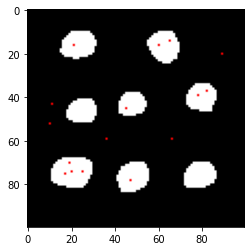

In [3]:
img = plt.imread('test.tiff')
points = np.array([(16, 21), (14, 65), (16, 60), (20, 89), (37, 82), (39, 78), (43, 11), (45, 45),
                   (52, 10), (59, 36), (59, 66), (70, 19), (74, 20), (74, 25), (75, 17), (78, 47)])

draw_points(img, points)
tp, fp, fn = count_agreements(img, points)
print(f'tp = {tp}, fp = {fp}, fn = {fn}')